목적 : 토픽모델링을 활용해서 유저가 선택할 태그와 실제 사용할 태그 선택하기

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

plt.rcParams['font.family'] = "AppleGothic"

In [2]:
import json
with open('/Users/hyo-cheolahn/Documents/Projects/Book-Recommendation/data/scraping/all_book_data.json', "r") as file:
    data = json.load(file)

In [6]:
from kiwipiepy import Kiwi
from kiwipiepy.utils import Stopwords
kiwi = Kiwi(model_type='sbg', typos='basic')
stopwords = Stopwords()

In [7]:
import pandas as pd

texts = []
texts_tokenized = []
for el in data:
    t1 = [x.split(':')[-1].strip() for x in el['description'].split('\n')] # 여러개의 라인으로 된 데이터 정리
    t2 = [' '.join([r.form for r in kiwi.tokenize(s, stopwords=stopwords)]) for s in t1] # 데이터 토큰화, 불용어 제거
    texts.append(' '.join(t1))
    texts_tokenized.append(' '.join(t2))
df = pd.DataFrame()
df['texts'] = texts
df['texts_tokenized'] = texts_tokenized
df.head()


,texts,texts_tokenized
0,행복을 찾는 방법이 아니라불행에 대한 수비력을 길러주는58가지 인생 이야기《1cm ...,행복 찾 방법 불행 수비력 기르 58 가지 인생 이야기 1 cm 다이빙 홈 in 홈...
1,"좋은 감각을 지니려면,디자인을 잘하려면,더 나은 브랜드를 만들려면 어떻게 해야 하는...",좋 감각 지니 려면 디자인 잘 려면 낫 브랜드 만들 려면 어떻 는가 섬세 감각 타 ...
2,“코난밖에 모르던 내가 일본어로 먹고살아요‘그저 좋아하다가 잘하게 된 센님의 일본어...,코난 밖에 모르 일본어 먹 살 어요 그저 좋 다가 잘 되 샌님 일본어 덕질 기 26...
3,"당신의 행복을 찾아 주고 싶다이렇게 행복해도 되나 싶을 정도로이런 하루가, 이런 인...",당신 행복 찾 싶 이렇 행복 어도 나 싶 정도 이런 하루 이런 인생 좋 정도 10 ...
4,"디 에센셜 한강한강 작가의 장편소설, 단편소설, 시, 산문을 한 권으로 만난다!작가...",디 에센셜 한강 한강 작가 장편 소설 단편 소설 시 산문 권 만나 작가 핵심 작품 ...


In [13]:
texts = []
texts_tokenized = []
for el in data:
    t1 = [x.split(':')[-1].strip() for x in el['key_sentences'].split('\n')] # 여러개의 라인으로 된 데이터 정리
    t2 = [' '.join([r.form for r in kiwi.tokenize(s, stopwords=stopwords)]) for s in t1] # 데이터 토큰화, 불용어 제거
    texts.append(' '.join(t1))
    texts_tokenized.append(' '.join(t2))
df['texts_ks'] = texts
df['texts_ks_tokenized'] = texts_tokenized
df.head()

,texts,texts_tokenized,texts_ks,texts_ks_tokenized
0,행복을 찾는 방법이 아니라불행에 대한 수비력을 길러주는58가지 인생 이야기《1cm ...,행복 찾 방법 불행 수비력 기르 58 가지 인생 이야기 1 cm 다이빙 홈 in 홈...,"그냥 지금처럼 살아라. 그렇게 살되 어떤 감정조차 책임질 수 없을 만큼 힘든 날, ...",그냥 지금 처럼 살 어라 그렇게 살 되 어떤 감정 조차 책임지 만큼 힘들 날 마음속...
1,"좋은 감각을 지니려면,디자인을 잘하려면,더 나은 브랜드를 만들려면 어떻게 해야 하는...",좋 감각 지니 려면 디자인 잘 려면 낫 브랜드 만들 려면 어떻 는가 섬세 감각 타 ...,"여러 회사와 각종 분야, 다양한 프로젝트를 넘나들며 일을 하면서도, 늘 저의 중심을...",여러 회사 각종 분야 다양 프로젝트 넘나들 늘 저 중심 잡 스스로 책임지 결정 마음...
2,“코난밖에 모르던 내가 일본어로 먹고살아요‘그저 좋아하다가 잘하게 된 센님의 일본어...,코난 밖에 모르 일본어 먹 살 어요 그저 좋 다가 잘 되 샌님 일본어 덕질 기 26...,하지만 오로지 애니를 보기만 했을 뿐 다른 노력은 전혀 하지 않았는데 이만큼이나 들...,하지만 오로지 애니 뿐 다른 노력 전혀 는데 만큼 이나 들리 다니 공짜 외국어 영역...
3,"당신의 행복을 찾아 주고 싶다이렇게 행복해도 되나 싶을 정도로이런 하루가, 이런 인...",당신 행복 찾 싶 이렇 행복 어도 나 싶 정도 이런 하루 이런 인생 좋 정도 10 ...,"오늘도 괜찮다. 덜 걱정해도 될 일이고, 그만 불안해도 되는 날이다. 다 지나간 일...",오늘 괜찮 덜 걱정 어도 그만 불안 어도 날 다 지나가 지나가 날 시간 답 살 내 ...
4,"디 에센셜 한강한강 작가의 장편소설, 단편소설, 시, 산문을 한 권으로 만난다!작가...",디 에센셜 한강 한강 작가 장편 소설 단편 소설 시 산문 권 만나 작가 핵심 작품 ...,"그때에는 그녀에게 말言이 있었으므로, 감정들은 더 분명하고 강했을 것이다.그러나 지...",그때 그녀 言 으므로 감정 분명 강하 그러나 지금 그녀 몸 속 단어 문장 마치 혼령...


In [25]:

df_combined = df['texts_tokenized'].str.cat(df['texts_ks_tokenized'], sep=' | ')
df_combined.head()

0    행복 찾 방법 불행 수비력 기르 58 가지 인생 이야기 1 cm 다이빙 홈 in 홈...
1    좋 감각 지니 려면 디자인 잘 려면 낫 브랜드 만들 려면 어떻 는가 섬세 감각 타 ...
2    코난 밖에 모르 일본어 먹 살 어요 그저 좋 다가 잘 되 샌님 일본어 덕질 기 26...
3    당신 행복 찾 싶 이렇 행복 어도 나 싶 정도 이런 하루 이런 인생 좋 정도 10 ...
4    디 에센셜 한강 한강 작가 장편 소설 단편 소설 시 산문 권 만나 작가 핵심 작품 ...
Name: texts_tokenized, dtype: object

In [26]:
import gensim
from gensim import corpora, models

docs=[ d.split() for d in df_combined.to_list()]
dictionary = corpora.Dictionary(docs)
dictionary.filter_extremes(no_below=10,  ## filter_extremes를 통해 outlier를 제거할 수 있음
              no_above=0.5, 
              keep_n=10000)  # 빈도가 높은 토큰으로 sort한 뒤 빈도가 높은 순으로 자름
dictionary.compactify()
dictionary.save('./corpus.dict') 
corpus = [dictionary.doc2bow(doc) for doc in docs]


In [27]:
# perplexity, coherence 계산
def lda_model_values(num_topics, corpus, dictionary, texts):
    x = [] # x axis(topics)
    perplexity_values = [] # perplexity values listed by num_topics
    coherence_values = []   # coherence valeus listed by num_topics
    model_list = [] 

    for topic in range(num_topics):
        print("numbers of topics：", topic+1)
        lda_model = models.LdaModel(corpus=corpus, num_topics=topic+1, id2word=dictionary,
                       chunksize=2000, passes=20, iterations=200)  #chunksize: 얼마나 많은 문서가 훈련 시에 사용되는지? passes: 학습 시 전체 코퍼스에서 모델을 학습시키는 빈도 제어
        model_list.append(lda_model)
        x.append(topic+1)
        perplexity_values.append(lda_model.log_perplexity(corpus))
        coherencemodel = models.CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
        print(f"Training for LDA_model-Topic_num:{topic+1} is finished.\n")
    return model_list, x, perplexity_values, coherence_values


numbers of topics： 1
Training for LDA_model-Topic_num:1 is finished.

numbers of topics： 2
Training for LDA_model-Topic_num:2 is finished.

numbers of topics： 3
Training for LDA_model-Topic_num:3 is finished.

numbers of topics： 4
Training for LDA_model-Topic_num:4 is finished.

numbers of topics： 5
Training for LDA_model-Topic_num:5 is finished.

numbers of topics： 6
Training for LDA_model-Topic_num:6 is finished.

numbers of topics： 7
Training for LDA_model-Topic_num:7 is finished.

numbers of topics： 8
Training for LDA_model-Topic_num:8 is finished.

numbers of topics： 9
Training for LDA_model-Topic_num:9 is finished.

numbers of topics： 10


findfont: Generic family 'sans-serif' not found because none of the following families were found: NanumBarunGothic
findfont: Generic family 'sans-serif' not found because none of the following families were found: NanumBarunGothic
findfont: Generic family 'sans-serif' not found because none of the following families were found: NanumBarunGothic
findfont: Generic family 'sans-serif' not found because none of the following families were found: NanumBarunGothic
findfont: Generic family 'sans-serif' not found because none of the following families were found: NanumBarunGothic
findfont: Generic family 'sans-serif' not found because none of the following families were found: NanumBarunGothic
findfont: Generic family 'sans-serif' not found because none of the following families were found: NanumBarunGothic
findfont: Generic family 'sans-serif' not found because none of the following families were found: NanumBarunGothic
findfont: Generic family 'sans-serif' not found because none of the foll

Training for LDA_model-Topic_num:10 is finished.



findfont: Generic family 'sans-serif' not found because none of the following families were found: NanumBarunGothic
findfont: Generic family 'sans-serif' not found because none of the following families were found: NanumBarunGothic
findfont: Generic family 'sans-serif' not found because none of the following families were found: NanumBarunGothic
findfont: Generic family 'sans-serif' not found because none of the following families were found: NanumBarunGothic
findfont: Generic family 'sans-serif' not found because none of the following families were found: NanumBarunGothic
findfont: Generic family 'sans-serif' not found because none of the following families were found: NanumBarunGothic
findfont: Generic family 'sans-serif' not found because none of the following families were found: NanumBarunGothic
findfont: Generic family 'sans-serif' not found because none of the following families were found: NanumBarunGothic
findfont: Generic family 'sans-serif' not found because none of the foll

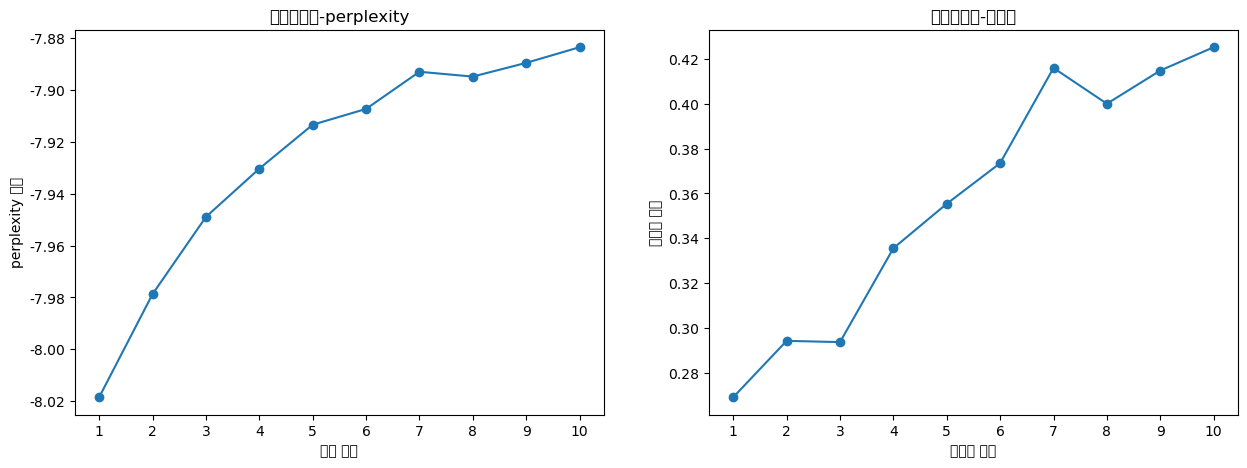

In [28]:
import matplotlib.pyplot as plt
import matplotlib
from pylab import xticks,yticks,np

num_topics = 10

# training models based on range(num_topics)
model_list, x, perplexity_values, coherence_values = lda_model_values(num_topics, corpus, dictionary, docs) 

# plotting every perplexity&coherence
fig = plt.figure(figsize=(15,5))
# plt.rcParams['font.sans-serif']=['NanumBarunGothic']
plt.rcParams['font.family'] = "AppleGothic"
matplotlib.rcParams['axes.unicode_minus'] = False 


ax1 = fig.add_subplot(1, 2, 1)
plt.plot(x, perplexity_values, marker="o")
plt.title("토픽모델링-perplexity")
plt.xlabel('토픽 규모')
plt.ylabel('perplexity 규모')
xticks(np.linspace(1, num_topics, num_topics, endpoint=True)) # interval of x axis labels == 1



ax2 = fig.add_subplot(1, 2, 2)
plt.plot(x, coherence_values, marker="o")
plt.title("토픽모델링-일관성")
plt.xlabel("토픽수 규모")
plt.ylabel("일관성 규모")
xticks(np.linspace(1, num_topics, num_topics, endpoint=True))


plt.show()

In [29]:
num_topics = 15

In [30]:
lda = models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, 
                 num_topics=num_topics, random_state=1, 
                 chunksize = 2000, passes=20, iterations = 400)

In [31]:
for t in lda.show_topics(): print(t)

(2, '0.017*"문학" + 0.015*"환자" + 0.014*"p." + 0.012*"읽" + 0.012*"글" + 0.012*"의사" + 0.011*"소설" + 0.011*"죽음" + 0.010*"작가" + 0.008*"병원"')
(11, '0.131*"ᆸ니다" + 0.111*"습니다" + 0.026*"저" + 0.015*"시" + 0.014*"지요" + 0.009*"스님" + 0.008*"p." + 0.008*"당신" + 0.007*"세요" + 0.007*"요"')
(1, '0.008*"돈" + 0.007*"회사" + 0.007*"사회" + 0.006*"공부" + 0.006*"학교" + 0.006*"대" + 0.006*"학생" + 0.006*"생활" + 0.006*"교육" + 0.006*"p."')
(6, '0.027*"p." + 0.009*"당신" + 0.007*"ᆯ" + 0.007*"너" + 0.006*"ᆯ까" + 0.006*"순간" + 0.005*"작가" + 0.005*"행복" + 0.005*"으면" + 0.005*"그런"')
(13, '0.025*"동물" + 0.025*"고양이" + 0.021*"식물" + 0.018*"장애" + 0.016*"장애인" + 0.014*"p." + 0.011*"인간" + 0.009*"개" + 0.008*"어린이" + 0.007*"환경"')
(4, '0.038*"먹" + 0.015*"음식" + 0.014*"맛" + 0.013*"밥" + 0.012*"술" + 0.010*"마시" + 0.009*"p." + 0.008*"집" + 0.007*"커피" + 0.006*"요리"')
(5, '0.010*"인간" + 0.010*"p." + 0.008*"사회" + 0.007*"세계" + 0.006*"그것" + 0.006*"존재" + 0.006*"자기" + 0.005*"여성" + 0.004*"이나" + 0.004*"는다"')
(7, '0.013*"여행" + 0.008*"집" + 0.008*"곳" + 0.007*"p." + 0.006*"그

In [ ]:
# generate a wordcloud for each topic
from wordcloud import WordCloud 
wc = WordCloud(background_color='white',
        font_path='/Users/hyo-cheolahn/Library/Fonts/NanumGothic-Regular')

plt.figure(figsize=(30,30))
for t in range(lda.num_topics):
    plt.subplot(5,4,t+1)
    x = dict(lda.show_topic(t,200))
    im = wc.generate_from_frequencies(x)
    plt.imshow(im)
    plt.axis("off")
    plt.title("Topic #" + str(t))

In [40]:
import pyLDAvis
import pyLDAvis.gensim_models

In [ ]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda, corpus, dictionary)
vis

In [42]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument  # TaggedDocument는 corpus의 id(=tag)를 함께 넘겨줌
docs=[ d.split() for d in df['texts_tokenized'].to_list()]
tagged_data = [TaggedDocument(d, tags=[str(i)]) for i, d in enumerate(docs)]